In [210]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
#load the dataset
df = pd.read_csv(r"C:\Users\maria\Documents\Dissertation\cirrhosis+patient+survival+prediction+dataset-1\cirrhosis.csv")

In [214]:
df = df.copy()

In [216]:
df.select_dtypes(['object'])  # Select columns of type 'object'

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,D,D-penicillamine,F,Y,Y,Y,Y
1,C,D-penicillamine,F,N,Y,Y,N
2,D,D-penicillamine,M,N,N,N,S
3,D,D-penicillamine,F,N,Y,Y,S
4,CL,Placebo,F,N,Y,Y,N
...,...,...,...,...,...,...,...
413,D,NaN,F,NaN,NaN,NaN,N
414,C,NaN,F,NaN,NaN,NaN,N
415,C,NaN,F,NaN,NaN,NaN,N
416,C,NaN,F,NaN,NaN,NaN,N


In [218]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [220]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Status
C     232
D     161
CL     25
Name: count, dtype: int64


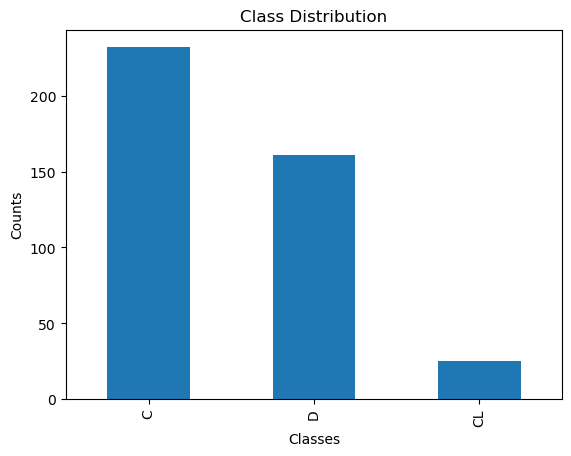

In [222]:
# Assuming your target variable is 'Status'
class_counts = df['Status'].value_counts()
print(class_counts)

# Visualization
import matplotlib.pyplot as plt
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

In [224]:
df.shape

(418, 20)

In [226]:
from sklearn.impute import KNNImputer

In [228]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder



# List of categorical columns (excluding numerical ones)
categorical_cols = ['Status', 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Sex']
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Check if there are any numerical columns
if not numerical_cols:
    print("No numerical columns found in the DataFrame.")
else:
    # Identify columns with missing values that are numerical
    numerical_cols_with_missing = df[numerical_cols].columns[df[numerical_cols].isnull().any()].tolist()

    # Print the numerical columns with missing values
    print("Numerical columns with missing values:", numerical_cols_with_missing)

    # Impute only numerical data with missing values if any exist
    if numerical_cols_with_missing:
        imputer = KNNImputer(n_neighbors=5)
        df[numerical_cols_with_missing] = imputer.fit_transform(df[numerical_cols_with_missing])
    else:
        print("No numerical columns with missing values to impute.")

# Encode only the categorical columns
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Optionally, convert encoded labels back to their original form if needed
for col in categorical_cols:
    if col in label_encoders:  # Check if encoder exists
        df[col] = label_encoders[col].inverse_transform(df[col])

# Check the dataset for missing values
print(df.isnull().sum())


Numerical columns with missing values: ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [230]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,nan,24472,F,nan,nan,nan,N,1.2,375.4,2.96,147.2,1286.0,123.38,108.8,174.0,10.9,3.0
414,415,1103,C,nan,14245,F,nan,nan,nan,N,0.9,552.6,3.83,68.2,1471.4,123.38,106.4,180.0,11.2,4.0
415,416,1055,C,nan,20819,F,nan,nan,nan,N,1.6,312.6,3.42,70.6,1062.4,92.91,131.4,143.0,9.9,3.0
416,417,691,C,nan,21185,F,nan,nan,nan,N,0.8,389.2,3.75,66.6,1412.6,90.36,174.2,269.0,10.4,3.0


In [232]:
df['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

In [234]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


In [236]:
# Standardization
numerical_cols = ['Bilirubin', 'Cholesterol', 'Age', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
scaler = StandardScaler()


In [238]:
# Ensure the numerical columns are cast to float before scaling
df[numerical_cols] = df[numerical_cols].astype(float)


In [240]:
df.loc[:, numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [242]:
# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['Stage', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], drop_first=True)

In [244]:
# Label Encoding for ordinal categorical variables
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])  # Example if Status is ordinal

In [308]:
df['Status'].value_counts()

Status
0    232
2    161
1     25
Name: count, dtype: int64

In [246]:
df

,ID,N_Days,Status,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,...,Drug_nan,Sex_M,Ascites_Y,Ascites_nan,Hepatomegaly_Y,Hepatomegaly_nan,Spiders_Y,Spiders_nan,Edema_S,Edema_Y
0,1,400,2,0.768941,2.562152,-0.490518,2.60,0.853692,-0.103955,0.422885,...,False,False,True,False,True,False,True,False,False,True
1,2,4500,0,0.546706,-0.481759,-0.281839,4.14,-0.483026,2.897693,-0.056370,...,False,False,False,False,True,False,True,False,False,False
2,3,1012,2,1.852567,-0.413611,-0.923145,3.48,1.561366,-0.739520,-0.398107,...,False,True,False,False,False,False,False,False,True,False
3,4,1925,2,0.383244,-0.322748,-0.577043,2.54,-0.351975,2.224585,-1.093938,...,False,False,False,False,True,False,True,False,True,False
4,5,1504,1,-1.210972,0.040704,-0.398903,3.53,0.683326,-0.657563,-0.063629,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,1.558178,-0.459043,0.091747,2.96,0.738368,-0.332378,0.137058,...,True,False,False,True,False,True,False,True,False,False
414,415,1103,0,-1.125174,-0.527190,0.993646,3.83,-0.296933,-0.234346,0.137058,...,True,False,False,True,False,True,False,True,False,False
415,416,1055,0,0.599707,-0.368180,-0.227888,3.42,-0.265481,-0.450608,-0.460686,...,True,False,False,True,False,True,False,True,False,False
416,417,691,0,0.695737,-0.549906,0.161985,3.75,-0.317902,-0.265437,-0.510711,...,True,False,False,True,False,True,False,True,False,False


In [248]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage_-1.164877761269741', 'Stage_-0.7081058061001805',
       'Stage_-0.47971982851539996', 'Stage_-0.25133385093062',
       'Stage_-0.022947873345839514', 'Stage_1.1189820145780618',
       'Drug_Placebo', 'Drug_nan', 'Sex_M', 'Ascites_Y', 'Ascites_nan',
       'Hepatomegaly_Y', 'Hepatomegaly_nan', 'Spiders_Y', 'Spiders_nan',
       'Edema_S', 'Edema_Y'],
      dtype='object')

In [250]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


In [252]:
# Separate classes
class_0 = df[df['Status'] == 0]
class_1 = df[df['Status'] == 1]
class_2 = df[df['Status'] == 2]

In [254]:
# Select 10 samples from class 1 for testing
class_1_test = class_1.sample(n=10, random_state=42)

In [256]:
# Remaining samples from class 1 for training
class_1_train = class_1.drop(class_1_test.index)

In [258]:
# Combine class 0 and class 2 for the training set
remaining_classes = pd.concat([class_0, class_2])


In [260]:
#Split remaining classes into train and test
remaining_train, remaining_test = train_test_split(
    remaining_classes,
    test_size=0.2,
    random_state=42,
    stratify=remaining_classes['Status']
)

In [262]:
# Combine the train and test sets
X_train_original = pd.concat([remaining_train, class_1_train])
y_train_original = X_train_original['Status']

X_test_original = pd.concat([remaining_test, class_1_test])
y_test_original = X_test_original['Status']


In [264]:
# Drop the target variable from the feature set
X_train_original = X_train_original.drop('Status', axis=1)
X_test_original = X_test_original.drop('Status', axis=1)

In [266]:
from imblearn.combine import SMOTETomek
# Apply SMOTE + Tomek Links to balance the training data with the defined sampling strategy
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_original, y_train_original)

In [268]:
# Combine the resampled data with the original training set
X_train_combined = pd.concat([X_train_original, X_train_resampled])
y_train_combined = pd.concat([y_train_original, y_train_resampled])


In [270]:
# Standard libraries
import numpy as np
import pandas as pd

# Scikit-learn models and utilities
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# CatBoost
from catboost import CatBoostClassifier

# XGBoost
from xgboost import XGBClassifier

# Imbalanced-learn (for resampling techniques like SMOTE)
from imblearn.over_sampling import SMOTE

# Additional utilities
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [292]:
# Define ensemble models with hyperparameter grids
models = {
    'RandomForest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'GradientBoosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }),
    'XGBoost': (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    
   
}


In [294]:
# Train each model with GridSearchCV and select the best model
best_models = {}
for model_name, (model, params) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, scoring='f1_weighted', cv=3, verbose=2, n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    

Training RandomForest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training GradientBoosting...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Training AdaBoost...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 50}
Training XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:52:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [296]:
# Fine-tune on combined data
best_model.fit(X_train_combined, y_train_combined)
best_models[model_name] = best_model


C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:52:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [298]:
# 1. **Voting Classifier** as part of hybridization (Bagging + Boosting combination)
voting_clf = VotingClassifier(estimators=[
    (name, model) for name, model in best_models.items()
], voting='soft')

In [300]:
from xgboost import XGBClassifier
import lightgbm as lgb  # Import LightGBM
from catboost import CatBoostClassifier  # Import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# 2. **Stacking Classifier**: Use the base models as input to a meta-learner
stacking_clf = StackingClassifier(
    estimators=[(name, model) for name, model in best_models.items()],
    #final_estimator=DecisionTreeClassifier(random_state=42),
    #final_estimator= RandomForestClassifier(random_state=42),
    final_estimator=AdaBoostClassifier(n_estimators=100, random_state=42),
    #final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=len(y_train_original) / (2 * (y_train_original == 1).sum())),
    #final_estimator=lgb.LGBMClassifier(num_leaves=31, max_depth=-1, n_estimators=100),  # LightGBM as the final estimator
   #final_estimator=CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0),  # CatBoost as the final estimator
    cv=3,  # Cross-validation for the meta-learner
    n_jobs=-1
)

In [302]:
# 3. Train the stacking model on combined data (hybridization with stacking)
stacking_clf.fit(X_train_combined, y_train_combined)


C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


StackingClassifier(cv=3,
                   estimators=[('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints...
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...))],
                   final_estimator=AdaBoostClassifier(n_estimators=100,
                                                      random_state=42),
                   n_jobs=-1)

In [304]:
# Make predictions using Stacking Classifier on original test data
y_pred_stacking = stacking_clf.predict(X_test_original)


In [306]:
#Confusion Matrix and Classification Report for Stacking Classifier
print("\nConfusion Matrix (Stacking Classifier):")
print(confusion_matrix(y_test_original, y_pred_stacking))
print("\nClassification Report (Stacking Classifier):")
print(classification_report(y_test_original, y_pred_stacking, target_names=label_encoder.classes_))


Confusion Matrix (Stacking Classifier):
[[43  3  1]
 [ 4  5  1]
 [ 8  2 22]]

Classification Report (Stacking Classifier):
              precision    recall  f1-score   support

           C       0.78      0.91      0.84        47
          CL       0.50      0.50      0.50        10
           D       0.92      0.69      0.79        32

    accuracy                           0.79        89
   macro avg       0.73      0.70      0.71        89
weighted avg       0.80      0.79      0.78        89



In [190]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Calculate and print the accuracy
accuracy = accuracy_score(y_test_original, y_pred_stacking)
print(f"\nAccuracy of Stacking Classifier: {accuracy:.2f}")


Accuracy of Stacking Classifier: 0.79


In [ ]:
#Confusion Matrix (Stacking Classifier with xgboost):
#[[42  2  3]
# [ 5  4  1]
# [ 5  3 24]]
#Confusion Matrix (Stacking Classifier with lgbm):
#[[37  4  6]
 #[ 5  4  1]
 #[ 4  1 27]]
#Confusion Matrix (Stacking Classifier with catboost):
#[40  4  3]
# [ 4  5  1]
 #[ 6  3 23]]
#Confusion Matrix (Stacking Classifier adaboost):
#[[43  3  1]
# [ 4  5  1]
 #[ 8  2 22]]
#Confusion Matrix (Stacking Classifier random forest):
#[[40  4  3]
 #[ 5  4  1]
# [ 6  1 25]]
#Confusion Matrix (Stacking Classifier with decision tree ):
#[[38  3  6]
# [ 4  4  2]
 #[ 3  1 28]]





In [170]:
# Dynamic Sampling Phase with Hyperparameter Tuning (Hybridization)

def dynamic_sampling_with_tuning(X, y, models, iterations=5):
    best_models = {}
    for i in range(iterations):
        print(f"Dynamic Sampling Iteration {i+1}/{iterations}")
        
        for model_name, (model, params) in models.items():
            print(f"Dynamic Sampling - Training {model_name}...")
            # Apply SMOTE for dynamic sampling
            smote = SMOTE(sampling_strategy='auto', random_state=42)
            X_resampled, y_resampled = smote.fit_resample(X, y)

            # Combine with the original samples for further fine-tuning
            X_combined = pd.concat([X, X_resampled])
            y_combined = pd.concat([y, y_resampled])

            # Use GridSearchCV for dynamic sampling iterations
            grid_search = GridSearchCV(
                model, params, scoring='f1_weighted', cv=3, verbose=2, n_jobs=-1
            )

            # Fit with the dynamically sampled data
            grid_search.fit(X_combined, y_combined)
            best_model = grid_search.best_estimator_
            print(f"Iteration Best Parameters for {model_name}: {grid_search.best_params_}")

            # Update the best model for the current iteration
            best_models[model_name] = best_model

    return best_models


In [172]:
# Perform dynamic sampling with tuning and get the best models
best_models_dynamic = dynamic_sampling_with_tuning(X_train_original, y_train_original, models)

Dynamic Sampling Iteration 1/5
Dynamic Sampling - Training RandomForest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Iteration Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Dynamic Sampling - Training GradientBoosting...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Iteration Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Dynamic Sampling - Training AdaBoost...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Iteration Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Dynamic Sampling - Training XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:24:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Dynamic Sampling Iteration 2/5
Dynamic Sampling - Training RandomForest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Iteration Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Dynamic Sampling - Training GradientBoosting...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Iteration Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Dynamic Sampling - Training AdaBoost...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Iteration Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Dynamic Sampling - Training XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:24:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Dynamic Sampling Iteration 3/5
Dynamic Sampling - Training RandomForest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Iteration Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Dynamic Sampling - Training GradientBoosting...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Iteration Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Dynamic Sampling - Training AdaBoost...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Iteration Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Dynamic Sampling - Training XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:25:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Dynamic Sampling Iteration 4/5
Dynamic Sampling - Training RandomForest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Iteration Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Dynamic Sampling - Training GradientBoosting...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Iteration Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Dynamic Sampling - Training AdaBoost...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Iteration Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Dynamic Sampling - Training XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:25:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Dynamic Sampling Iteration 5/5
Dynamic Sampling - Training RandomForest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Iteration Best Parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Dynamic Sampling - Training GradientBoosting...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Iteration Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Dynamic Sampling - Training AdaBoost...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Iteration Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Dynamic Sampling - Training XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Iteration Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:26:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [174]:
# Create a Voting Classifier using the best dynamically tuned models
voting_clf_dynamic = VotingClassifier(estimators=[
    (name, model) for name, model in best_models_dynamic.items()
], voting='soft')

In [176]:
# Fit the dynamically tuned voting classifier on the combined training data
voting_clf_dynamic.fit(X_train_combined, y_train_combined)

C:\Users\maria\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\maria\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:26:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('GradientBoosting',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('AdaBoost',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=100,
                                                 random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            co...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

In [178]:
# Predict using the dynamically tuned Voting Classifier on the original test set
y_pred_dynamic_voting = voting_clf_dynamic.predict(X_test_original)

In [180]:
# Confusion Matrix and Classification Report for the Dynamically Tuned Voting Classifier
print("\nConfusion Matrix (Dynamically Tuned Voting Classifier):")
print(confusion_matrix(y_test_original, y_pred_dynamic_voting))
print("\nClassification Report (Dynamically Tuned Voting Classifier):")
print(classification_report(y_test_original, y_pred_dynamic_voting, target_names=label_encoder.classes_))


Confusion Matrix (Dynamically Tuned Voting Classifier):
[[44  0  3]
 [ 6  2  2]
 [ 6  0 26]]

Classification Report (Dynamically Tuned Voting Classifier):
              precision    recall  f1-score   support

           C       0.79      0.94      0.85        47
          CL       1.00      0.20      0.33        10
           D       0.84      0.81      0.83        32

    accuracy                           0.81        89
   macro avg       0.87      0.65      0.67        89
weighted avg       0.83      0.81      0.79        89

